In [128]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import f1_score, roc_auc_score

In [16]:
df=pd.read_csv("D:/Final Project/train.csv")

In [6]:
df

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,cellular,17,nov,977,3,unknown,yes
45207,71,retired,divorced,primary,cellular,17,nov,456,2,unknown,yes
45208,72,retired,married,secondary,cellular,17,nov,1127,5,success,yes
45209,57,blue-collar,married,secondary,telephone,17,nov,508,4,unknown,no


In [ ]:
df.info()

In [25]:
df.drop_duplicates().shape

(45205, 11)

In [ ]:
df.isna().sum()

In [28]:
df.dtypes

age                int64
job               object
marital           object
education_qual    object
call_type         object
day                int64
mon               object
dur                int64
num_calls          int64
prev_outcome      object
y                 object
dtype: object

In [30]:
df.age.value_counts()

age
32    2084
31    1996
33    1972
34    1929
35    1894
      ... 
95       2
93       2
92       2
88       2
94       1
Name: count, Length: 77, dtype: int64

In [31]:
df.job.value_counts()

job
blue-collar      9730
management       9457
technician       7596
admin.           5170
services         4153
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: count, dtype: int64

In [32]:
df.marital.value_counts()

marital
married     27210
single      12788
divorced     5207
Name: count, dtype: int64

In [33]:
df.education_qual.value_counts()

education_qual
secondary    23199
tertiary     13299
primary       6850
unknown       1857
Name: count, dtype: int64

In [34]:
df.call_type.value_counts()

call_type
cellular     29282
unknown      13017
telephone     2906
Name: count, dtype: int64

In [40]:
df.prev_outcome.value_counts()

prev_outcome
unknown    36953
failure     4901
other       1840
success     1511
Name: count, dtype: int64

In [41]:
df.y.value_counts()

y
no     39916
yes     5289
Name: count, dtype: int64

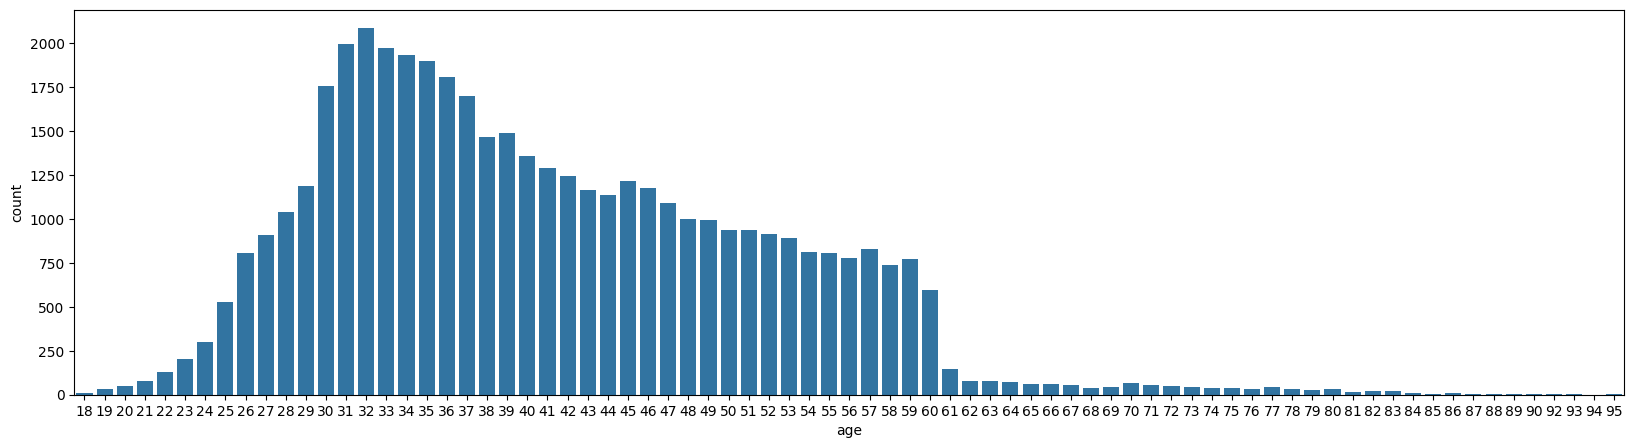

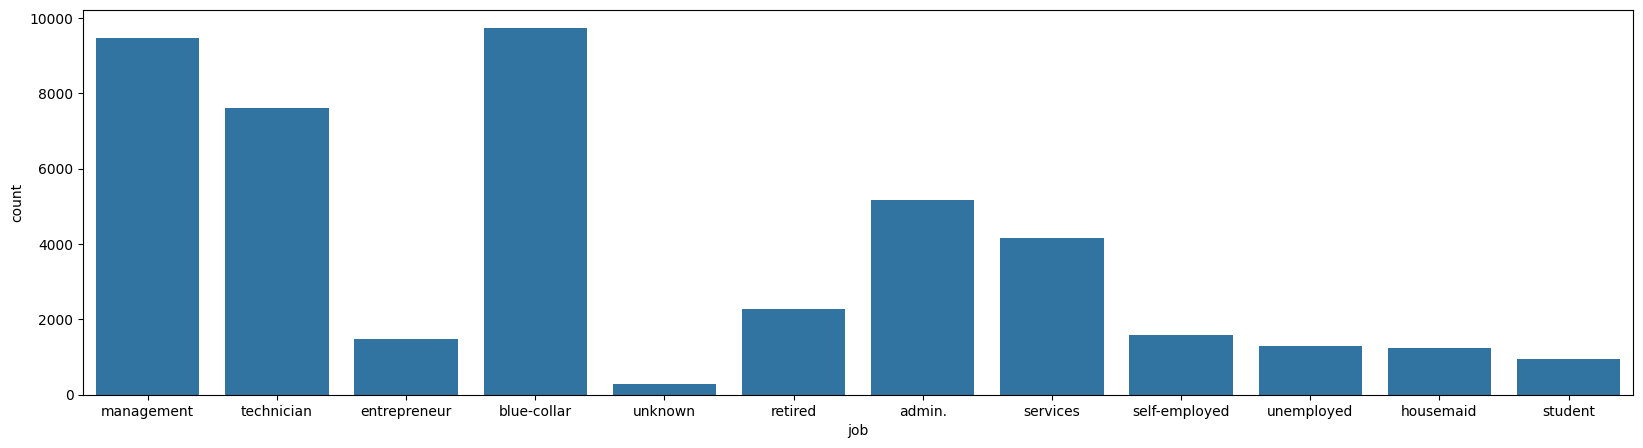

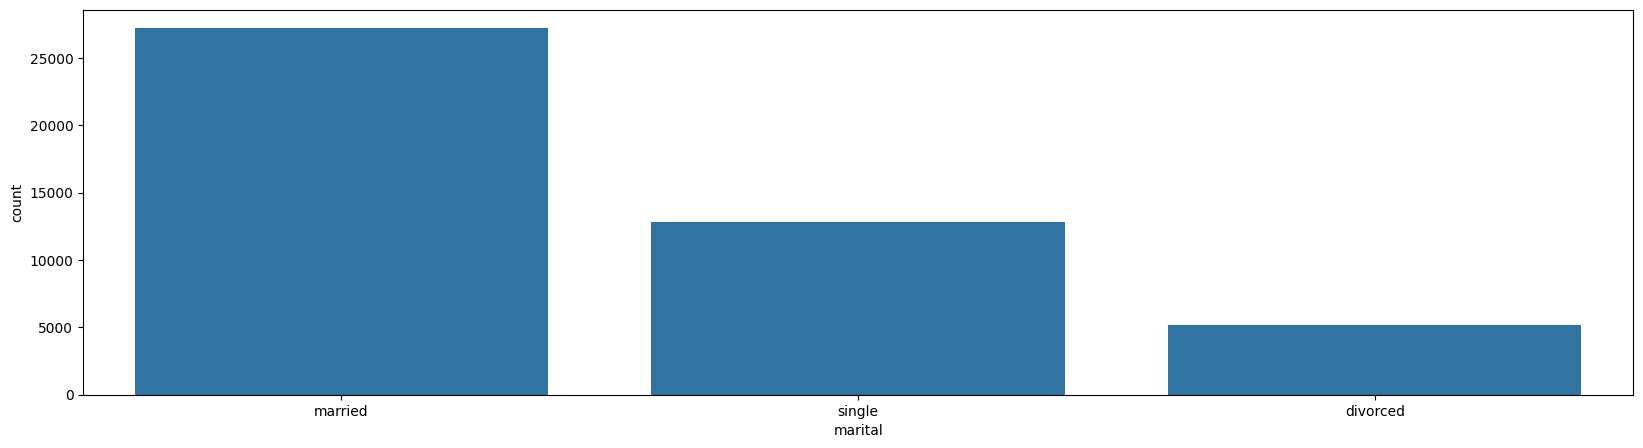

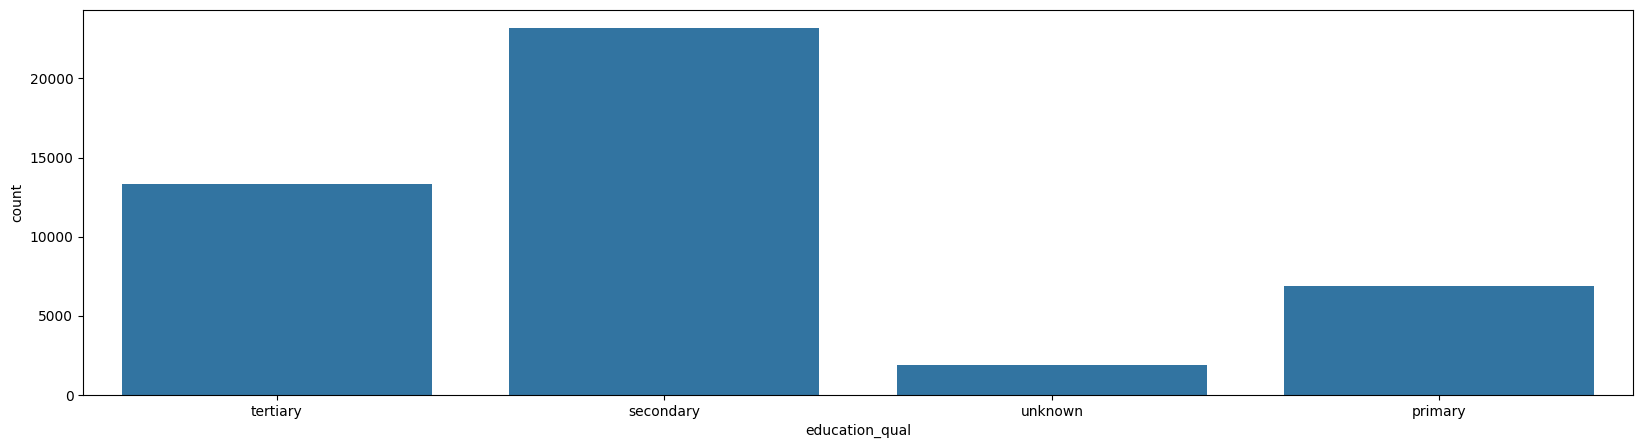

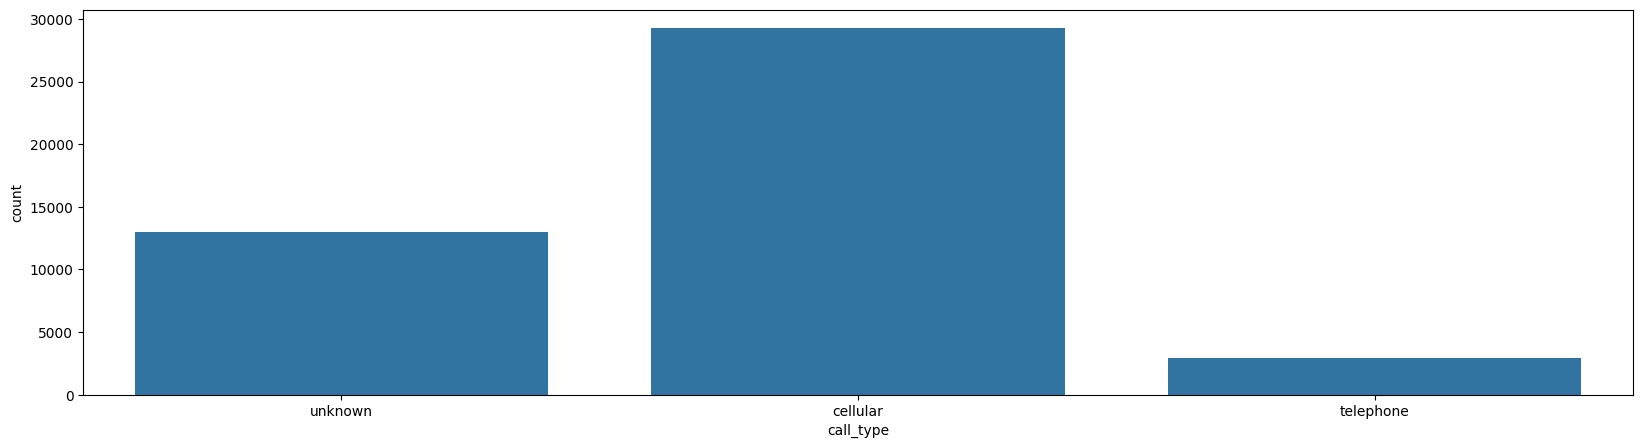

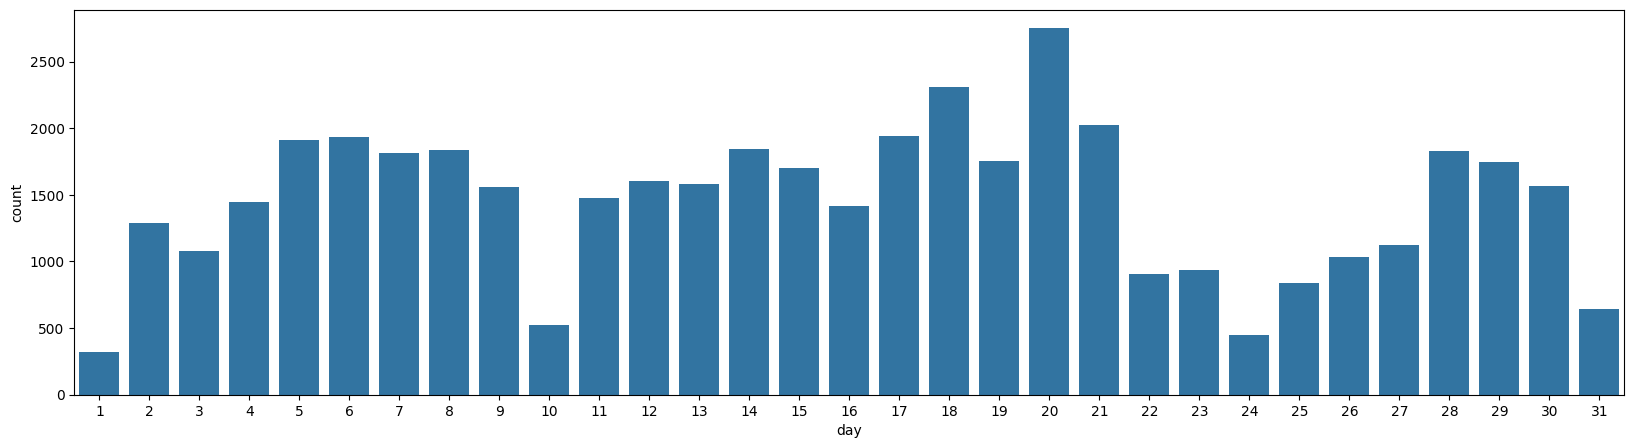

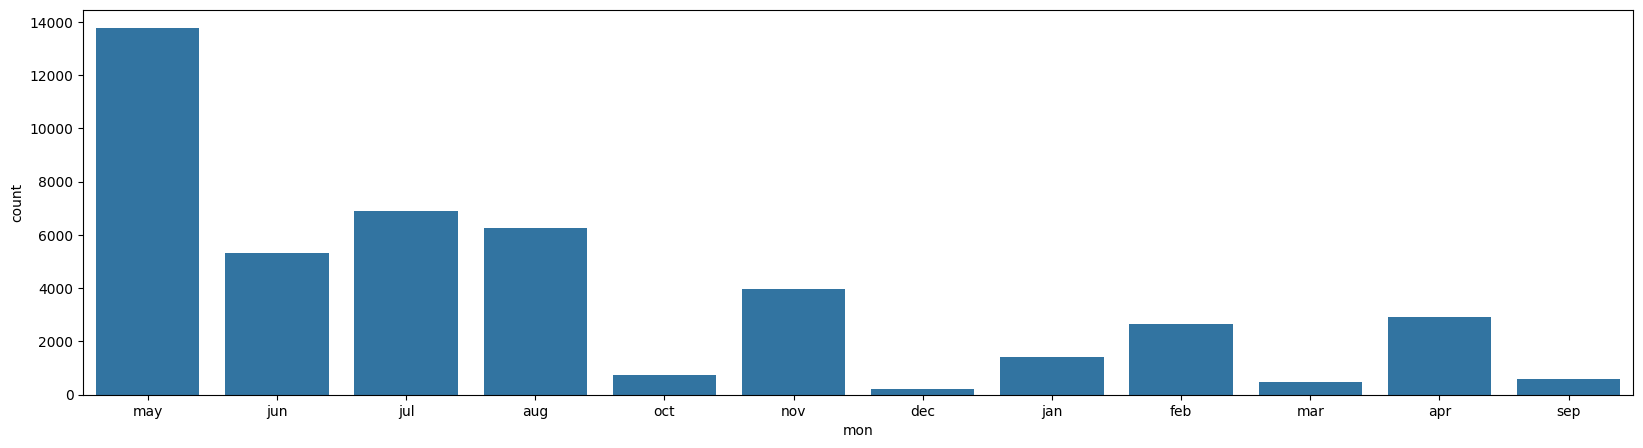

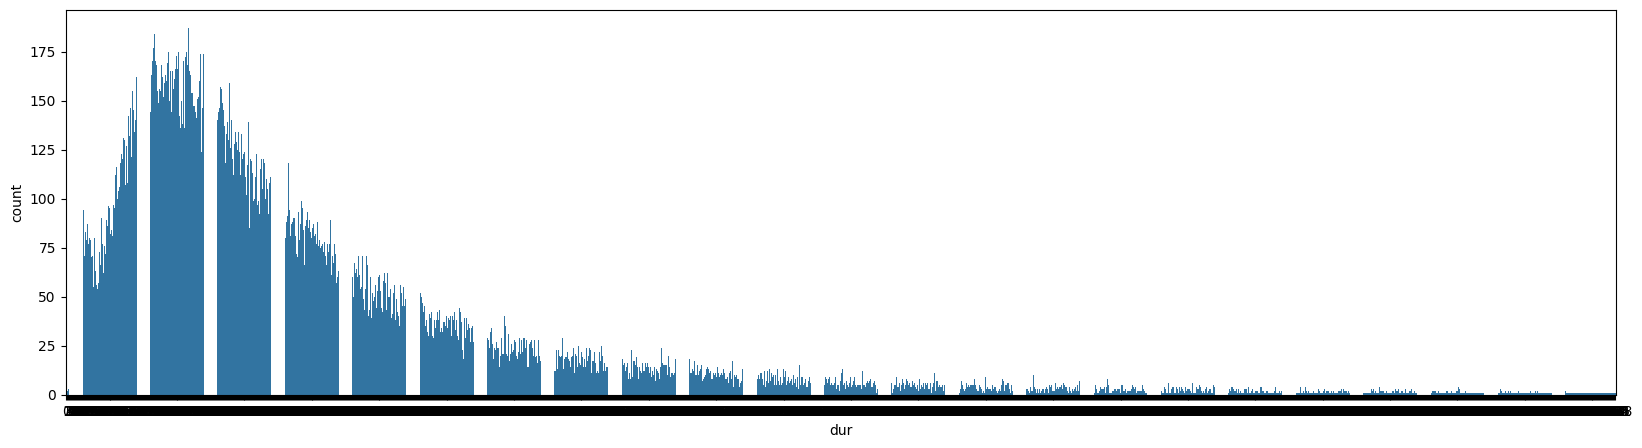

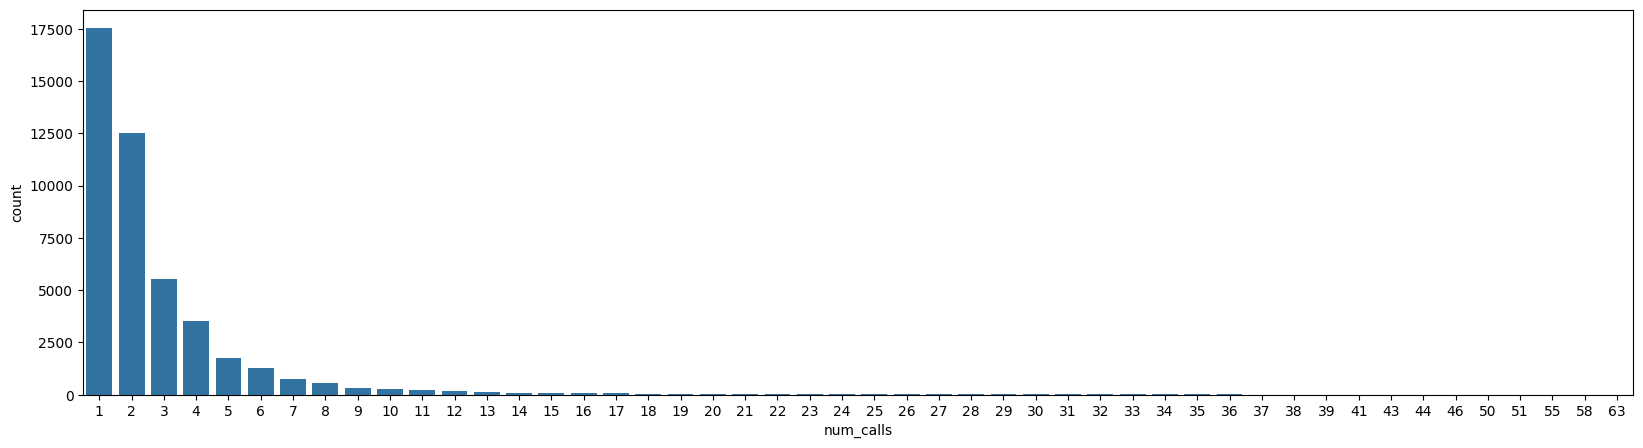

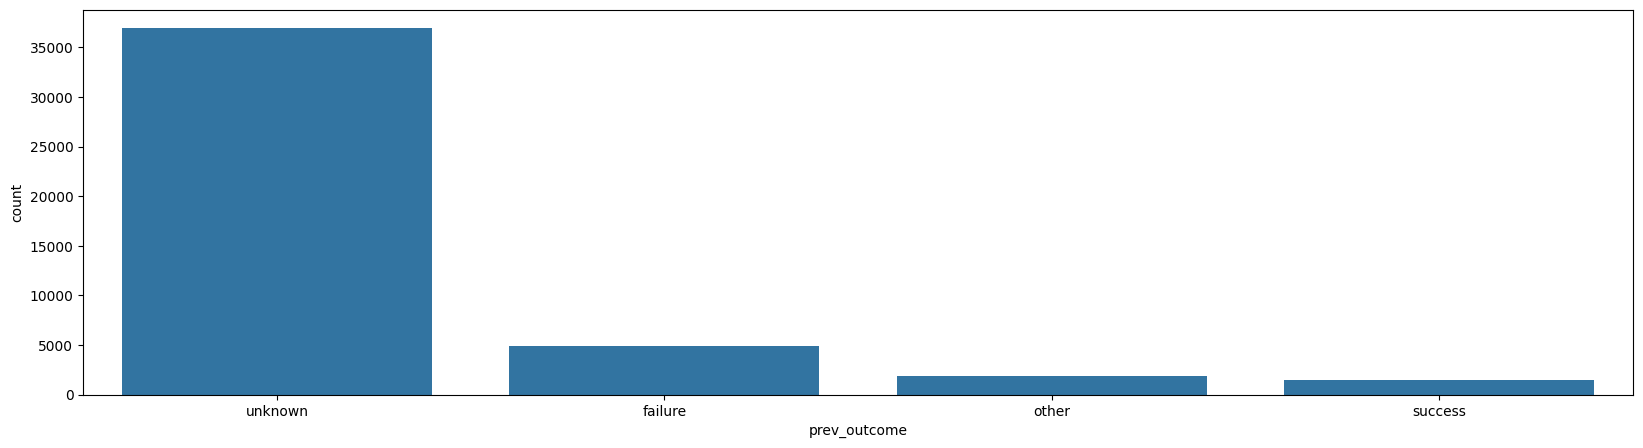

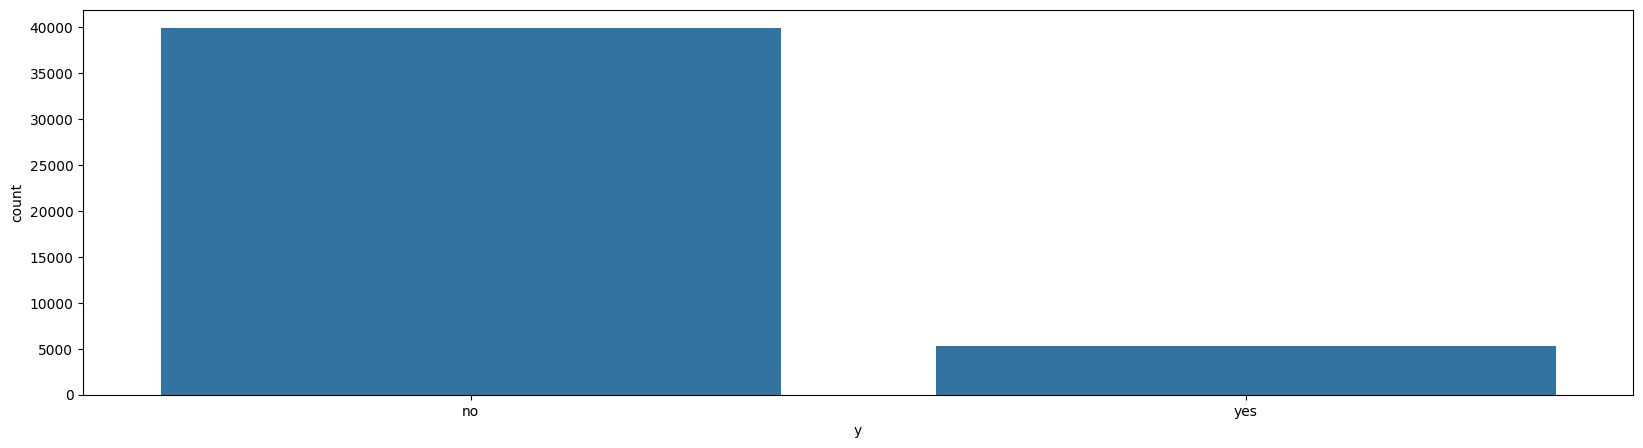

In [54]:
for i in df.columns:
  plt.figure(figsize = (20,5))
  sns.countplot(x=df[i])

In [ ]:

fig, ax = plt.subplots()

b = sns.histplot(df.dur, ax=ax)
ax.set_xlim(0, 1000)
b
     

OBSERVATIONS
What the Insurance Company has done so far

Middle aged men (i.e 30-35 age) are targeted more.
Blue Collar and Management people are targeted high.
More calls are made to the married.
People who have done their Secondary educations are called more.
Cellular type calls are made more.
Most number of calls have been made on the 20th day of the month.
High number of calls are made in the May month than any other month.
Mostly they are calling once only. Average number of calls is 3.
Most of the previous outcome of the calls are unknown.
Mean duration of the calls is 100 secs.
Only few people have subscribed to the insurance. i.e data is highly imbalanced.

In [56]:
df.y = df.y.map({'no':0,'yes':1})

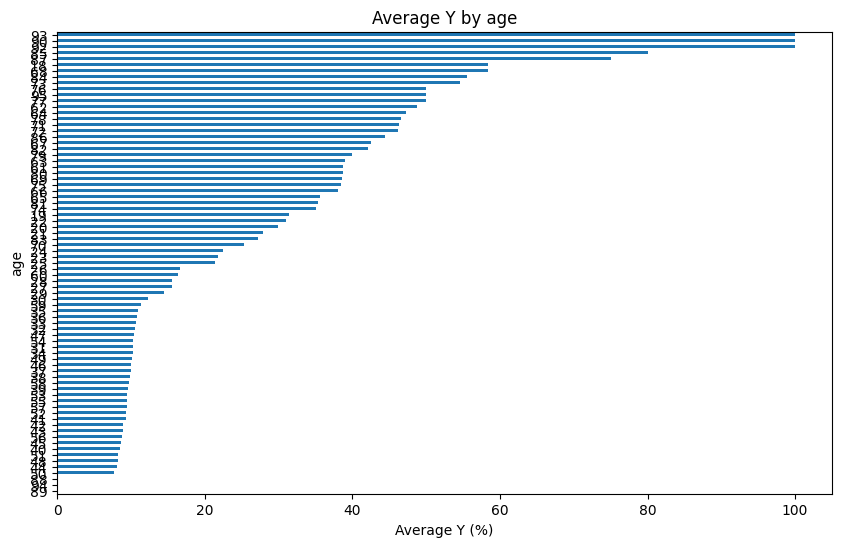

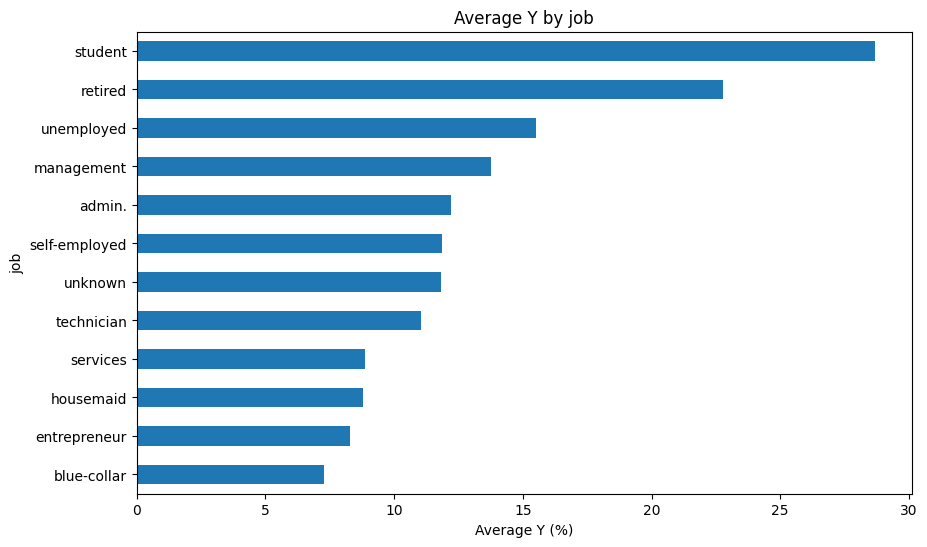

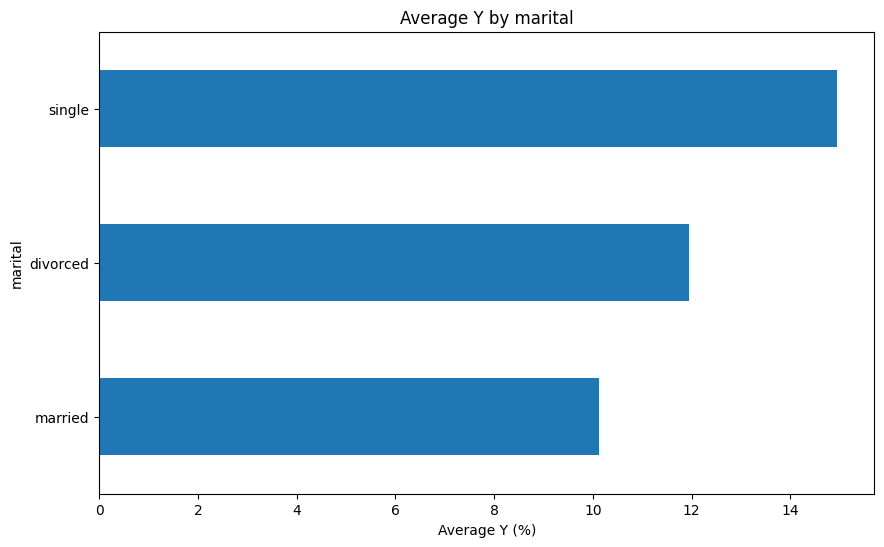

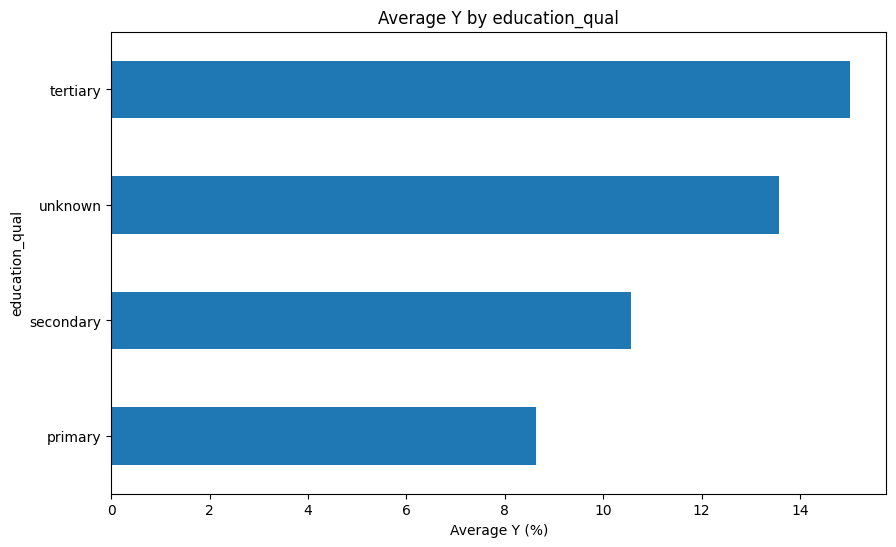

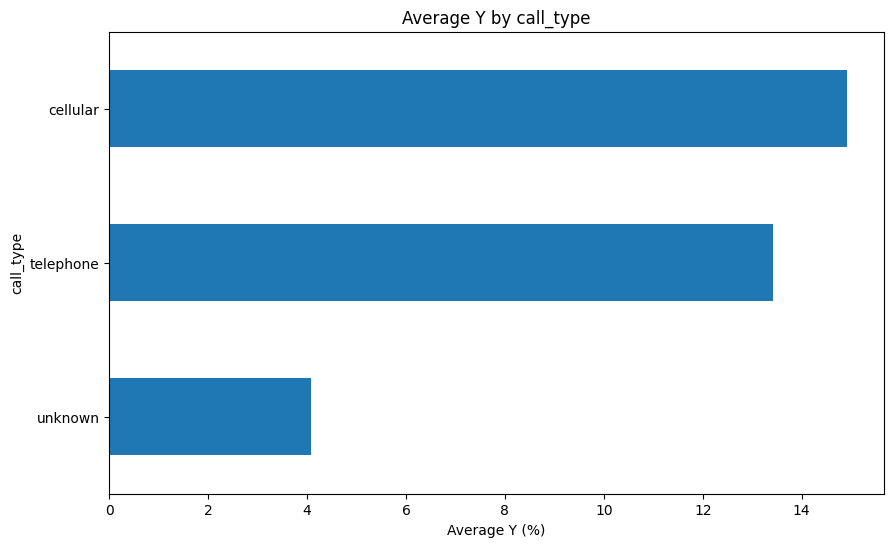

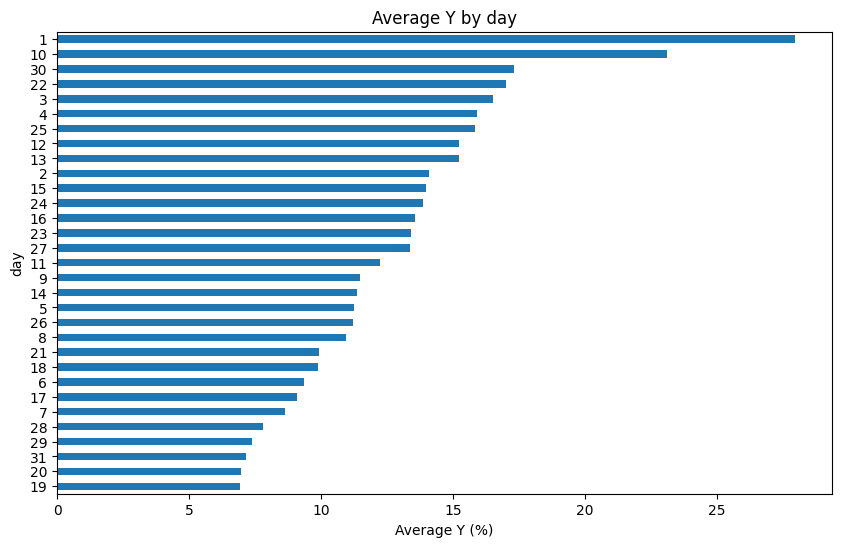

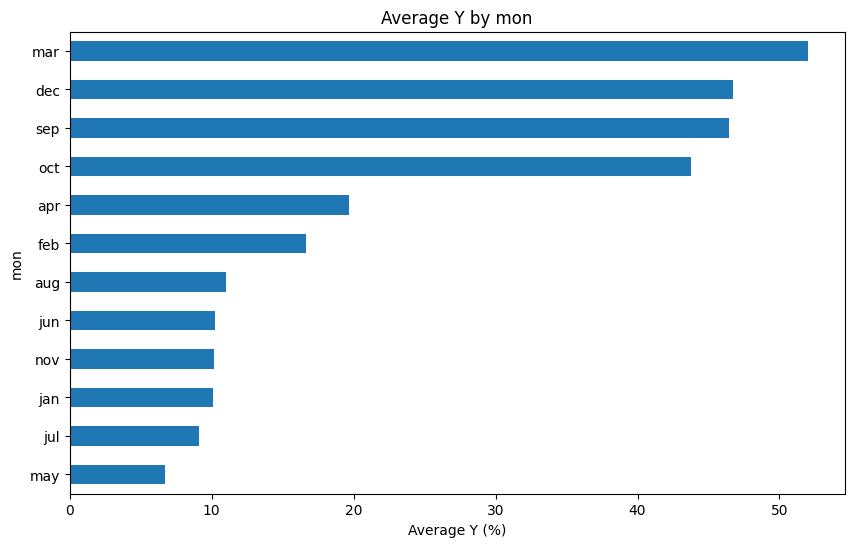

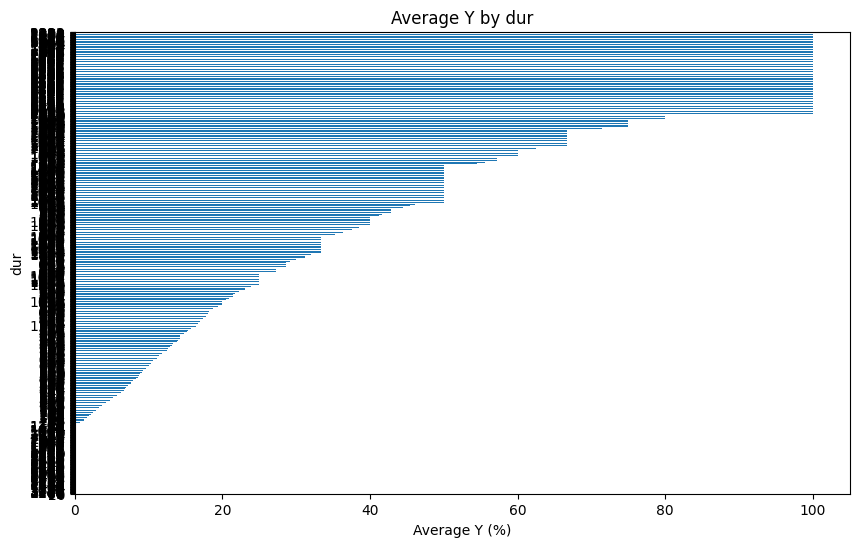

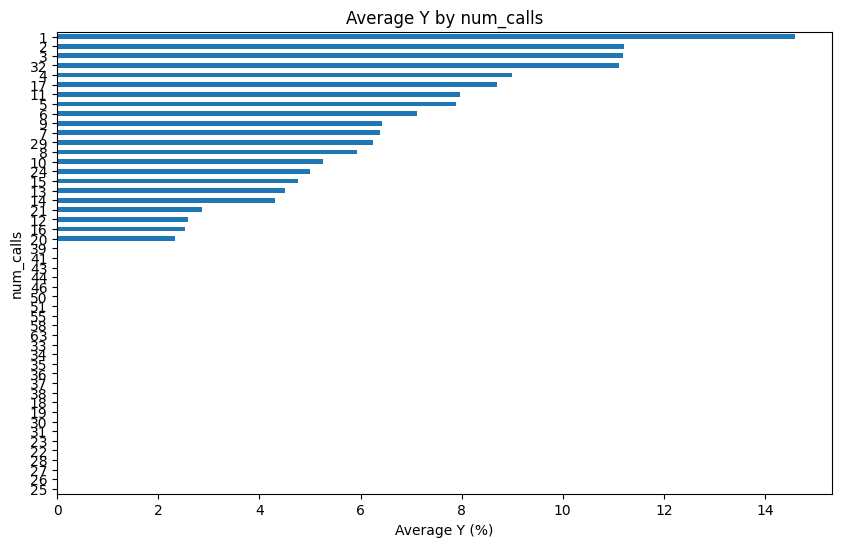

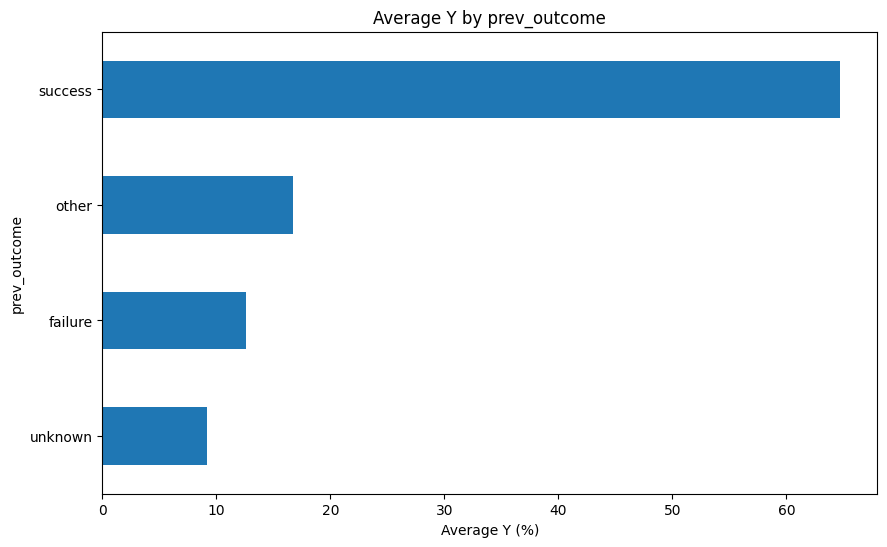

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt

def barplot(df):
    for col in df.columns:
        if col != "y":  # Avoid plotting "y" against itself
            plt.figure(figsize=(10, 6))  # Adjust figure size as needed
            (df.groupby(col)['y'].mean() * 100).sort_values().plot(kind='barh')
            plt.title(f"Average Y by {col}")
            plt.xlabel("Average Y (%)")
            plt.ylabel(col)
            plt.show()

# Assuming your DataFrame is named 'data' (replace with your actual name)
barplot(df)

ANALYSIS

Very old age people of age 85-95 have subsribed more.
Students have subscribed more to the insurance.
Singles have subscribed more to the insurance.
People with tertiary education have brought more insurance.
Cellular calls have been converted more.
More people have brought the insurance on 1st day of the month.
In March month, more conversion is there.
Most customers have bought it in one call only.
Minimum duration of the call should be 200 secs.
If the previous outcome of the call is success, then the customer is more likely to convert.

INFERENCE (What the Company must do)
The Insurance Company

should target more old age people.
must speak to Students more than Blue collar or Management people.
should target singles more.
should try to make more calls on 1st day of the month.
should work hard on March month more than May.

ENCODING

In [ ]:
df.mon = df.mon.map({'may':5, 'jun':6, 'jul':7, 'aug':8, 'oct':10, 'nov':11, 'dec':12, 'jan':1, 'feb':2,'mar':3, 'apr':4, 'sep':9})
df.education_qual = df.education_qual.map({'tertiary':3, 'secondary':2, 'unknown':0, 'primary':1})
df.marital = df.marital.map({'married':24, 'single':16, 'divorced':32})
df.call_type = df.call_type.map({'unknown':0, 'cellular':1, 'telephone':2})
df.prev_outcome = df.prev_outcome.map({'unknown':2, 'failure':0, 'other':3, 'success':1})   

In [76]:
df.dtypes

age                int64
job               object
marital            int64
education_qual     int64
call_type          int64
day                int64
mon                int64
dur                int64
num_calls          int64
prev_outcome       int64
y                  int64
dtype: object

In [81]:
df.job.unique()

array([ 4,  9,  2,  1, 11,  5,  0,  7,  6, 10,  3,  8])

In [80]:

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df.job= encoder.fit_transform(df.job)


In [82]:

df.isnull().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

In [84]:
from sklearn.model_selection import train_test_split

X = df.drop(columns="y")
y = df.loc[:, "y"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 8)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((36164, 10), (9041, 10), (36164,), (9041,))

In [93]:
y_train.value_counts()

y
0    31957
1     4207
Name: count, dtype: int64

Balancing the data

In [ ]:
#IMBLEARN - SMOTE + ENN (OverSampling + Undersampling)
from imblearn.combine import SMOTEENN

cc = SMOTEENN(random_state=7)

X_train_smoteenn, y_train_smoteenn = cc.fit_resample(X_train, y_train)

In [134]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train_smoteenn, y_train_smoteenn)

y_pred_rf1 = rf.predict(X_test)


f1_rf1 = f1_score(y_test,y_pred_rf1)

pred_probs_rf1= rf.predict_proba(X_test)
auc_score_rf1 = roc_auc_score(y_test, pred_probs_rf1[:,1])
y_pred_rf1,f1_rf1,auc_score_rf1   

(array([0, 0, 0, ..., 0, 0, 0]),
 np.float64(0.5696361355081556),
 np.float64(0.9128969424864353))

In [135]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train_smoteenn, y_train_smoteenn)
y_pred_lr_1 = lr.predict(X_test)


f1_lr1 = f1_score(y_test,y_pred_lr_1)


pred_probs_lr1= lr.predict_proba(X_test)
auc_score_lr1 = roc_auc_score(y_test, pred_probs_lr1[:,1])
y_pred_lr_1,auc_score_lr1,f1_lr1

d:\Final Project\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


(array([0, 0, 0, ..., 0, 0, 1]),
 np.float64(0.841118495691528),
 np.float64(0.4078762306610408))

In [176]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train_smoteenn, y_train_smoteenn)

y_pred_xgb1 = xgb.predict(X_test)

f1_xgb1= f1_score(y_test,y_pred_xgb1) 

pred_probs_xgb1= xgb.predict_proba(X_test)
auc_score_xgb1 = roc_auc_score(y_test, pred_probs_xgb1[:,1])
y_pred_xgb1,auc_score_xgb1 ,f1_xgb1

(array([0, 0, 0, ..., 0, 0, 0]),
 np.float64(0.9170495787212607),
 np.float64(0.5754716981132075))

In [205]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV


xgb = XGBClassifier()
xgb.fit(X_train_smoteenn, y_train_smoteenn)

param_grid = {
    'max_depth': [3, 40, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200]
}

grid_search = GridSearchCV(xgb, param_grid, scoring='f1', cv=5)
grid_search.fit(X_train_smoteenn, y_train_smoteenn)

best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

In [207]:
from sklearn.metrics import classification_report, f1_score, roc_auc_score

# Get predictions and probabilities from the best model
y_pred1 = best_model.predict(X_test)
y_pred_prob = best_model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

# Print the classification report
print(classification_report(y_test, y_pred1))

# Calculate F1 score
f1_xgb2 = f1_score(y_test, y_pred1)

# Calculate ROC AUC score
f1_xgb3 = roc_auc_score(y_test, y_pred_prob)

f1_xgb2, f1_xgb3


              precision    recall  f1-score   support

           0       0.97      0.86      0.92      7959
           1       0.45      0.83      0.59      1082

    accuracy                           0.86      9041
   macro avg       0.71      0.85      0.75      9041
weighted avg       0.91      0.86      0.88      9041



(np.float64(0.5857002938295789), np.float64(0.9159079840559949))

In [195]:

from catboost import CatBoostClassifier
from sklearn.metrics import f1_score, roc_auc_score

# Initialize CatBoostClassifier (suppresses output during training)
cb = CatBoostClassifier(verbosity=0)

# Fit the model
cb.fit(X_train_smoteenn, y_train_smoteenn)

# Predict class labels
y_pred_cb1 = cb.predict(X_test)
print("Predicted Labels:", y_pred_cb1)

# Calculate F1 Score (weighted for imbalanced data)
f1_cb1 = f1_score(y_test, y_pred_cb1, average='weighted')
print('F1 Score:', f1_cb1)

# Get predicted probabilities and compute ROC AUC score
pred_probs_cb1 = cb.predict_proba(X_test)
auc_score_cb1 = roc_auc_score(y_test, pred_probs_cb1[:, 1])
print('ROC AUC Score:', auc_score_cb1)


ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

In [101]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score


# Train the DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train_smoteenn, y_train_smoteenn)

# Predict and calculate the F1 score
y_pred = model.predict(X_test)
f1 = f1_score(y_test, y_pred)

print(f"F1 Score: {f1}")

F1 Score: 0.5247740729199127


In [102]:
from sklearn.neighbors import KNeighborsClassifier

# Train KNN model
model = KNeighborsClassifier(n_neighbors=5)  # Adjust k as needed
model.fit(X_train_smoteenn, y_train_smoteenn)

# Predict and evaluate
y_pred = model.predict(X_test)
f1 = f1_score(y_test, y_pred)
print(f"F1 Score (KNN): {f1}")

F1 Score (KNN): 0.3829068083051666


In [138]:
from sklearn.svm import SVC

# Train SVM model
model = SVC(random_state=42)
model.fit(X_train_smoteenn, y_train_smoteenn)

# Predict and evaluate
y_pred = model.predict(X_test)
f1 = f1_score(y_test, y_pred)
print(f"F1 Score (SVM): {f1}")

F1 Score (SVM): 0.360546875


In [105]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

# Loop through different depths to evaluate model performance
for depth in range(1, 40):  # Using range(1, 21) for depths 1 to 20
    model = DecisionTreeClassifier(max_depth=depth,random_state=42)  # Corrected class name
    model.fit(X_train, y_train)
    
    # Training score on the training set
    train_score = model.score(X_train_smoteenn, y_train_smoteenn)
    
    # Cross-validation score using 10-fold cross-validation
    cross_val = np.mean(cross_val_score(model, X_train_smoteenn, y_train_smoteenn, cv=10))
    
    # Print the results
    print(f"Depth - {depth}, TrainScore: {train_score:.4f}, Cross-ValScore: {cross_val:.4f}")


Depth - 1, TrainScore: 0.4324, Cross-ValScore: 0.7886
Depth - 2, TrainScore: 0.5443, Cross-ValScore: 0.8040
Depth - 3, TrainScore: 0.6743, Cross-ValScore: 0.8356
Depth - 4, TrainScore: 0.6593, Cross-ValScore: 0.8606
Depth - 5, TrainScore: 0.6522, Cross-ValScore: 0.8790
Depth - 6, TrainScore: 0.6961, Cross-ValScore: 0.8921
Depth - 7, TrainScore: 0.7007, Cross-ValScore: 0.9016
Depth - 8, TrainScore: 0.6911, Cross-ValScore: 0.9068
Depth - 9, TrainScore: 0.7031, Cross-ValScore: 0.9134
Depth - 10, TrainScore: 0.7346, Cross-ValScore: 0.9198
Depth - 11, TrainScore: 0.7345, Cross-ValScore: 0.9261
Depth - 12, TrainScore: 0.7689, Cross-ValScore: 0.9296
Depth - 13, TrainScore: 0.7689, Cross-ValScore: 0.9342
Depth - 14, TrainScore: 0.7827, Cross-ValScore: 0.9367
Depth - 15, TrainScore: 0.7874, Cross-ValScore: 0.9386
Depth - 16, TrainScore: 0.8055, Cross-ValScore: 0.9413
Depth - 17, TrainScore: 0.8111, Cross-ValScore: 0.9419
Depth - 18, TrainScore: 0.8254, Cross-ValScore: 0.9425
Depth - 19, TrainSc

In [112]:

# Train the DecisionTreeClassifier with the correct parameter
model = DecisionTreeClassifier(random_state=42, max_depth=31)  # Corrected to max_depth
model.fit(X_train_smoteenn, y_train_smoteenn)

# Predict and calculate the F1 score
y_pred = model.predict(X_test)
f1 = f1_score(y_test, y_pred)

# Print the F1 score
print(f"F1 Score: {f1}")

F1 Score: 0.5247740729199127


          Feature  Importance
9    prev_outcome    0.560665
4       call_type    0.139889
7             dur    0.096911
6             mon    0.059219
2         marital    0.034335
8       num_calls    0.027381
5             day    0.023956
0             age    0.021936
1             job    0.020170
3  education_qual    0.015539


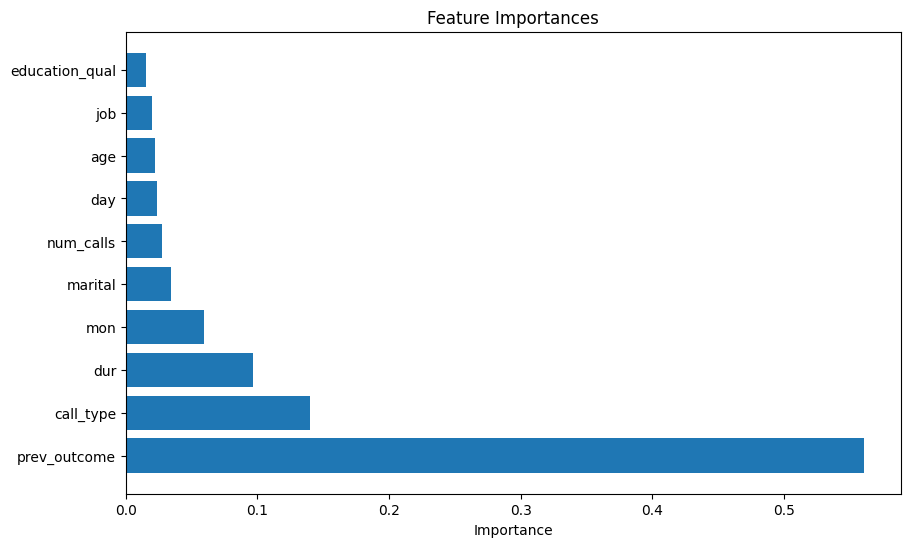

In [190]:
# Get feature importances
feature_importances = best_model.feature_importances_

# Create a DataFrame with feature names and their corresponding importance
feature_df = pd.DataFrame({
    'Feature': X_train_smoteenn.columns,  # Assuming X_train is a DataFrame
    'Importance': feature_importances
})

# Sort features by importance
feature_df = feature_df.sort_values(by='Importance', ascending=False)

# Print feature importances
print(feature_df)

# Optional: Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_df['Feature'], feature_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.show()


In [196]:
import pickle
# Save the trained model to a file
with open('trained_classification_model.pkl', 'wb') as file:
    pickle.dump(best_model, file)

In [197]:
import pickle
# Save the trained model to a file
with open('train.pkl', 'wb') as file:
    pickle.dump(df, file)

In [198]:
# 1. Predict values
predictions = best_model.predict(X_test)  # Replace `X_test` with the input DataFrame

# 2. Create a DataFrame with original and predicted values
df_comparison = X_test.copy()  # Copy the input features for context
df_comparison['Original'] = y_test.values  # Add the original target values
df_comparison['Predicted'] = predictions  # Add the predicted values

# Display the DataFrame
df_comparison

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,Original,Predicted
18396,47,0,24,2,2,31,7,15,2,2,0,0
40728,34,9,24,3,1,7,8,130,1,2,1,0
40194,35,0,24,3,1,8,6,86,1,2,0,0
1965,28,9,24,2,0,9,5,179,2,2,0,0
18563,43,4,32,3,1,31,7,92,3,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4943,39,5,24,3,0,21,5,786,2,2,0,1
36650,43,1,24,1,1,12,5,205,2,0,0,0
36154,33,0,24,2,1,11,5,100,1,2,0,0
29231,33,2,24,3,1,2,2,194,1,2,0,1


In [199]:
df.describe()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
count,45205.000000,45205.000000,45205.000000,45205.000000,45205.000000,45205.00000,45205.000000,45205.000000,45205.000000,45205.000000,45205.000000
mean,40.937087,4.339852,22.658378,2.060502,0.776330,15.80688,6.144586,258.183055,2.763898,1.790444,0.117000
std,10.619130,3.272637,4.865943,0.778714,0.549744,8.32234,2.408153,257.538504,3.098189,0.681098,0.321424
min,18.000000,0.000000,16.000000,0.000000,0.000000,1.00000,1.000000,0.000000,1.000000,0.000000,0.000000
25%,33.000000,1.000000,16.000000,2.000000,0.000000,8.00000,5.000000,103.000000,1.000000,2.000000,0.000000
50%,39.000000,4.000000,24.000000,2.000000,1.000000,16.00000,6.000000,180.000000,2.000000,2.000000,0.000000
75%,48.000000,7.000000,24.000000,3.000000,1.000000,21.00000,8.000000,319.000000,3.000000,2.000000,0.000000
max,95.000000,11.000000,32.000000,3.000000,2.000000,31.00000,12.000000,4918.000000,63.000000,3.000000,1.000000
